Cutoff: 0.25
  Error Rate: 0.30
  Sensitivity: 1.00
  Specificity: 0.60
Cutoff: 0.5
  Error Rate: 0.20
  Sensitivity: 0.60
  Specificity: 0.87
Cutoff: 0.75
  Error Rate: 0.15
  Sensitivity: 0.40
  Specificity: 1.00


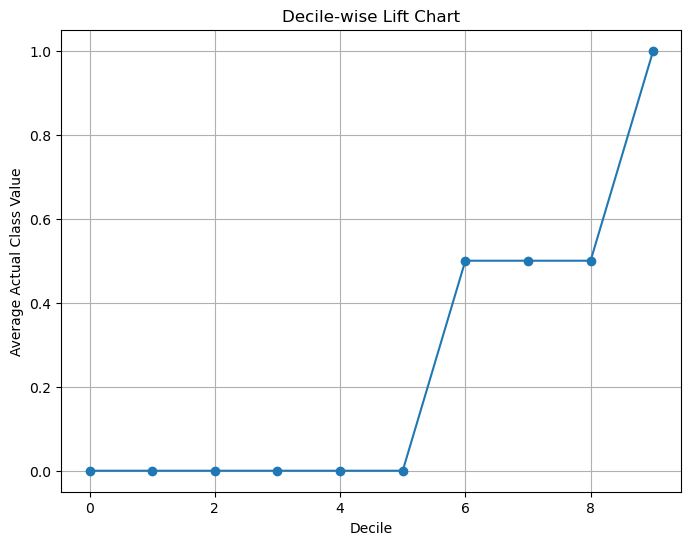

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Data
data = {
    "Propensity": [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21, 
                   0.43, 0.06, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
    "Actual": [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
df = pd.DataFrame(data)

# Function to calculate metrics
def calculate_metrics(df, cutoff):
    df['Prediction'] = (df['Propensity'] >= cutoff).astype(int)
    tn, fp, fn, tp = confusion_matrix(df['Actual'], df['Prediction']).ravel()
    
    error_rate = (fp + fn) / len(df)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return error_rate, sensitivity, specificity

# Metrics for different cutoffs
cutoffs = [0.25, 0.5, 0.75]
results = {}
for cutoff in cutoffs:
    results[cutoff] = calculate_metrics(df, cutoff)

# Display results
for cutoff, metrics in results.items():
    print(f"Cutoff: {cutoff}")
    print(f"  Error Rate: {metrics[0]:.2f}")
    print(f"  Sensitivity: {metrics[1]:.2f}")
    print(f"  Specificity: {metrics[2]:.2f}")

# Create Decile-wise Lift Chart
df['Decile'] = pd.qcut(df['Propensity'], 10, labels=False)
lift_data = df.groupby('Decile').agg({'Actual': 'mean'}).sort_index()

# Plot Lift Chart
plt.figure(figsize=(8, 6))
plt.plot(lift_data.index, lift_data['Actual'], marker='o', linestyle='-')
plt.title('Decile-wise Lift Chart')
plt.xlabel('Decile')
plt.ylabel('Average Actual Class Value')
plt.grid()
plt.show()